jupyter nbconvert --to slides cleanwater.ipynb --post serve --SlidesExporter.reveal_scroll=True
cd Documents/GitHub/Annual_Water_Depletion/dataproject_water/


# **OpenDataProject - CODE1161**

## *`Clean Water & Sanitation`*

### `Htay Hlaing Win - z5443603`
***

Looking at our beautiful blue planet from space, water appears abundant, covering about 71% of the Earth's surface. However, there's a hidden truth that often goes unnoticed. While water might seem endless, the availability of freshwater, the life-sustaining resource we rely on for our survival, is incredibly limited.


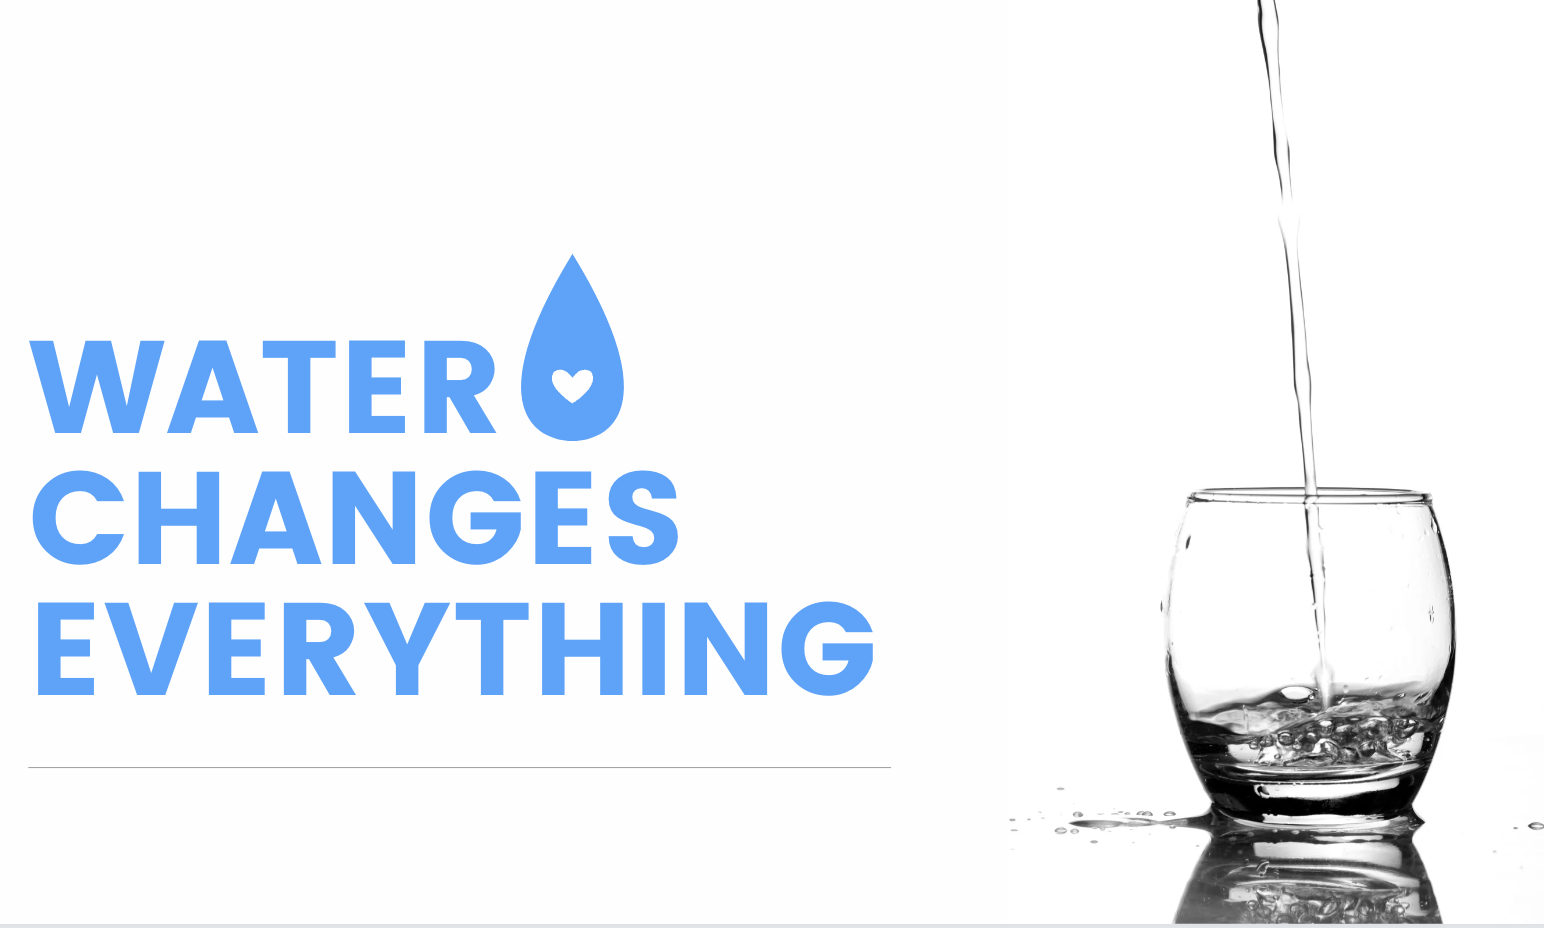

In [1]:
from IPython.display import Image
Image(filename="water_pic.png")

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import fiona
import os
from datetime import datetime
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


In [3]:
if os.path.isfile("water_distribution.csv"):
    filepath = "water_distribution.csv"
    print("loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/goal-6-clean-water-and-sanitation/#c4"
    print("loading from the internet")

water_disribution_data = pd.read_csv(filepath)
print("OK")
#Replace all Nan values to a string
#Nan_to_emptystring_water_distribution_data = water_disribution_data.replace(np.nan, 'Not Applicable', regex=True)
#print("Nan_to_string_water_distribution_data")


loading from file
OK


In [4]:
water_disribution_data.head()
water_disribution_data.sample(5)


water_source  water_volume_km3  pct_of_total_water  \
2        Groundwater|Saline          12870000               0.930   
0      Oceans, Seas, & Bays        1338000000              96.540   
7   Ground Ice & Permafrost            300000               0.022   
10               Atmosphere             12900               0.001   
1               Groundwater          23400000               1.690   

    pct_of_freshwater  is_fresh  is_subcategory  is_sum  
2                 NaN     False            True   False  
0                 NaN     False           False   False  
7                0.86      True           False   False  
10               0.04      True           False   False  
1                 NaN     False           False    True

### *`Freshwater is a limited resource`* 

Out of all the water on our planet, only a mere 2.5 percent is freshwater - that's the non-saline water we can use for irrigation, drinking, and meeting our daily needs. The remaining 97.5 percent is seawater, making it unsuitable for direct human consumption or crop irrigation.
****
Did you know that about 69 percent of all freshwater is actually trapped in glaciers? That means it's not readily available for use.
From the chart, Groundwater makes up the largest portion of the remaining freshwater. Surprisingly, it serves as the primary source of water supplies in many countries, even though it is hidden beneath the Earth's surface and can only be accessed through drilling.
Groundwater makes up the largest portion of the remaining freshwater. 

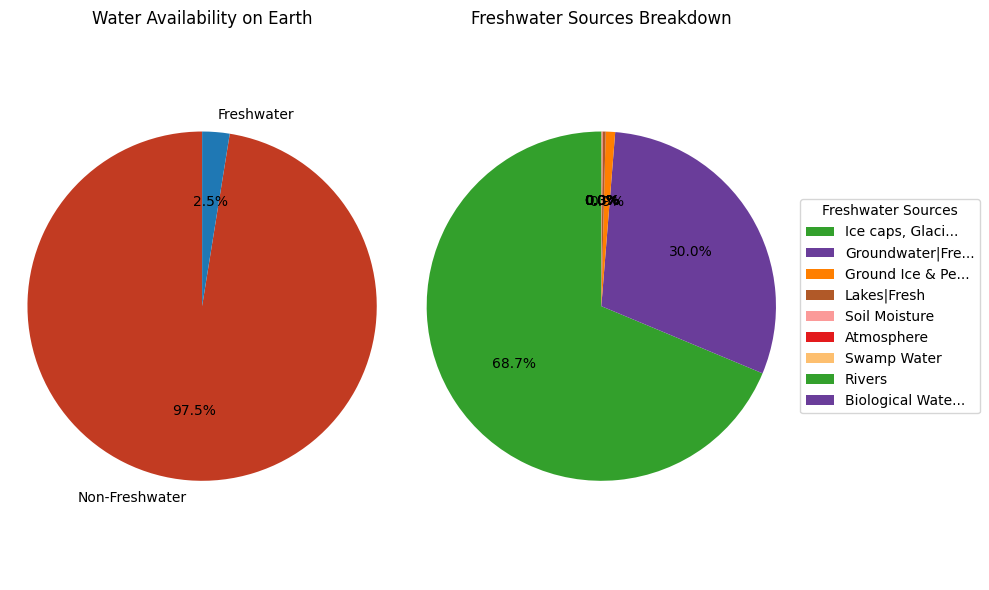

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Read data from the CSV file
data = pd.read_csv("water_distribution.xls")

#Categorize "Oceans, Seas, & Bays" as non-freshwater
data.loc[data['water_source'] == 'Oceans, Seas, & Bays', 'is_fresh'] = False

#Data for the pie chart
labels = ['Non-Freshwater', 'Freshwater']

#Calculate freshwater and non-freshwater percentages based on the data
freshwater_data = data[data['is_fresh']]
freshwater_percentage = freshwater_data['pct_of_total_water'].sum()
non_freshwater_percentage = 100 - freshwater_percentage
sizes = [non_freshwater_percentage, freshwater_percentage]

#Custom color palette for the pie chart with darker colors
colors = ['#C23B22', '#1F78B4', '#33A02C', '#6A3D9A', '#FF7F00',
          '#B15928', '#FB9A99', '#E31A1C', '#FDBF6F']

#Create the pie chart
plt.figure(figsize=(10, 6))

#first pie chart for Non-Freshwater and Freshwater
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors[:2], autopct='%1.1f%%',
        startangle=90)
plt.title('Water Availability on Earth')
plt.axis('equal')

#Data for nested pie chart (Freshwater sources breakdown)
freshwater_sources = freshwater_data['water_source'].tolist()
freshwater_percentages = freshwater_data['pct_of_total_water'].tolist()

#Second pie chart for Freshwater sources breakdown
plt.subplot(1, 2, 2)
plt.pie(freshwater_percentages, labels=None, colors=colors[2:], 
        autopct='%1.1f%%', startangle=90)
plt.title('Freshwater Sources Breakdown')
plt.axis('equal')

#Create a legend outside the pie chart to explain the labels in the nested chart
legend_labels = [f'{source[:15]}...' if len(source) > 15 
                 else source for source in freshwater_sources]
plt.legend(legend_labels, title='Freshwater Sources', loc='center left', 
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

Freshwater is unevenly distributed
The amount of available freshwater varies widely from country to country. Some countries are rich in surface waters, and enjoy abundant precipitation, 
 while others have no surface water resources, and see little rain or snow.
Heat from the sun helps create continuous circulation from sea to air to land as water alternates its states of liquid, vapor, and ice: This is called the water cycle. Renewable freshwater resources are generated from this cycle, which is a direct consequence of countries’ geographical position. This determines the water supply, which can come from rainfall over the territory, as well as from upstream rivers or aquifers, which may be shared with neighboring countries. Thus, the renewable freshwater supply is essentially finite, even though the amount available in any given area varies from year to year due to rainfall variability.
The global map shows the disparities of annual precipitation among regions
Mean annual precipitation (mm), 2021

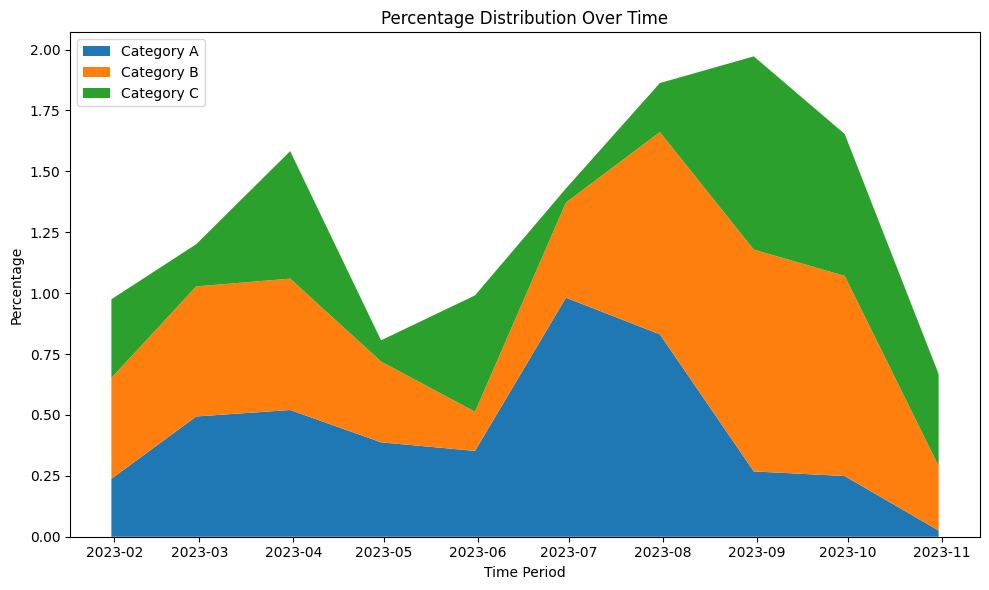

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating sample data for the stacked area chart
categories = ['Category A', 'Category B', 'Category C']
time_periods = pd.date_range(start='2023-01-01', periods=10, freq='M')
data_stacked_area = pd.DataFrame(np.random.rand(len(time_periods), len(categories)), columns=categories)
data_stacked_area['Date'] = time_periods

# Create the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(data_stacked_area['Date'], data_stacked_area[["Category A", "Category B", "Category C"]].T, labels=categories)
plt.xlabel("Time Period")
plt.ylabel("Percentage")
plt.title("Percentage Distribution Over Time")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Only **`0.3`** percent of all freshwater exists as surface water.

In [ ]:
import matplotlib.pyplot as plt

# Data for water sources and water volume
water_sources = [
    'Oceans, Seas, & Bays', 'Groundwater', 'Groundwater|Saline', 'Lakes', 'Lakes|Saline',
    'Ice caps, Glaciers, & Permanent Snow', 'Groundwater|Fresh', 'Ground Ice & Permafrost',
    'Lakes|Fresh', 'Soil Moisture', 'Atmosphere', 'Swamp Water', 'Rivers', 'Biological Water'
]

water_volume_km3 = [
    1338000000, 23400000, 12870000, 176400, 85400, 24064000, 10530000, 300000, 94000, 16500,
    12900, 11470, 2120, 1120
]

# Categorize water sources into surface freshwater and non-surface freshwater (excluding Oceans, Seas, & Bays)
surface_freshwater_sources = ['Lakes|Fresh', 'Soil Moisture', 'Atmosphere', 'Swamp Water', 'Rivers', 'Biological Water']
non_surface_freshwater_sources = ['Groundwater', 'Groundwater|Saline', 'Lakes|Saline', 'Ice caps, Glaciers, & Permanent Snow']

surface_freshwater_volume_km3 = sum([volume for source, volume in zip(water_sources, water_volume_km3) if source in surface_freshwater_sources])
non_surface_freshwater_volume_km3 = sum([volume for source, volume in zip(water_sources, water_volume_km3) if source in non_surface_freshwater_sources])

# Data for the pie chart
labels = ['Surface Freshwater', 'Non-Surface Freshwater']
sizes = [surface_freshwater_volume_km3, non_surface_freshwater_volume_km3]

# Custom color palette for the pie chart
colors = ['#1f78b4', '#ff7f0e']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Water Volumes: Surface Freshwater vs. Non-Surface Freshwater')
plt.axis('equal')
plt.show()


The solid state of ice caps, glaciers, and permanent snow makes them difficult to access for obtaining water. Thus, easily accessible surface freshwater accounts for less than 1% of the total.


In [ ]:
import xarray as xr

# Open the NetCDF file using xarray
nc_file = "timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc"
data = xr.open_dataset(nc_file)

# Print the list of variable names in the dataset
print(data)


In [ ]:
    import geopandas as gpd
    import xarray as xr
    import itertools
    import matplotlib.pyplot as plt

    # Step 1: Open the NetCDF file using xarray
    nc_file = "timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc"
    data = xr.open_dataset(nc_file)

    # Step 2: Extract the data for a specific time slice (e.g., index 0)
    time_slice = 0
    lon_values = data['lon'].values
    lat_values = data['lat'].values
    precipitation_values = data['timeseries-pr-annual-mean'].isel(time=time_slice).values

    # Step 3: Generate all possible combinations of lon and lat coordinates
    lon_lat_combinations = list(itertools.product(lon_values, lat_values))

    # Step 4: Create a GeoDataFrame with the extracted data and coordinates
    gdf = gpd.GeoDataFrame({'precipitation': precipitation_values.flatten()},
                            geometry=gpd.points_from_xy([lon for lon, _ in lon_lat_combinations],
                                                        [lat for _, lat in lon_lat_combinations]))

    # Step 5: Plot the data using GeoPandas and matplotlib
    gdf.plot(column='precipitation', cmap='viridis', legend=True)
    plt.title('Annual Mean Precipitation 1901-2021 (Time Slice: {})'.format(time_slice))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


The plot is visualizing the annual mean precipitation data for a specific time slice (year) from the CRU TS4.06 dataset. The dataset contains global precipitation data from 1901 to 2021.

In this plot:

- Each point on the map represents a specific grid cell location on the Earth's surface.
- The color of each point represents the annual mean precipitation value for the given year (time slice).
- The color scale (colormap) is set to 'viridis,' which is a perceptually uniform colormap that shows low precipitation in shades of blue and high precipitation in shades of yellow.

Interpreting the plot:

- Points with darker shades of yellow indicate regions with higher annual mean precipitation values, meaning these areas receive more rainfall throughout the year.
- Points with darker shades of blue represent regions with lower annual mean precipitation values, indicating areas with less rainfall throughout the year.

Please note that the plot shows the precipitation data for a specific year (time slice) from the dataset. You can change the `time_slice` variable in the code to visualize data for different years. Additionally, you can use different colormaps to customize the appearance of the plot.

In [ ]:
import os

shapefile_path = "/Users/brandonwu/Documents/GitHub/Annual_Water_Depletion/Clean_Water/110m_cultural/ne_110m_admin_0_boundary_lines_land.shp"

if os.path.exists(shapefile_path):
    print("Shapefile found in the current working directory.")
else:
    print("Shapefile not found. Please check the file path.")


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the shapefile using GeoPandas
shapefile_path = "/Users/brandonwu/Documents/GitHub/Annual_Water_Depletion/Clean_Water_Sanitation/110m_cultural/ne_110m_admin_0_countries.shp"
gdf = gpd.read_file(shapefile_path)

# Step 2: Plot the shapefile using GeoPandas
gdf.plot()

# Step 3: Customize the plot (if needed)
plt.title("Administrative Boundary Lines")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Step 4: Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import xarray as xr
import itertools
import matplotlib.pyplot as plt

# Step 1: Open the NetCDF file using xarray
nc_file = "timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc"
data = xr.open_dataset(nc_file)

# Step 2: Extract the data for a specific time slice (e.g., index 0)
time_slice = 0
lon_values = data['lon'].values
lat_values = data['lat'].values
precipitation_values = data['timeseries-pr-annual-mean'].isel(time=time_slice).values

# Step 3: Generate all possible combinations of lon and lat coordinates
lon_lat_combinations = list(itertools.product(lon_values, lat_values))

# Step 4: Create a GeoDataFrame with the extracted data and coordinates
gdf_precipitation = gpd.GeoDataFrame({'precipitation': precipitation_values.flatten()},
                                      geometry=gpd.points_from_xy([lon for lon, _ in lon_lat_combinations],
                                                                  [lat for _, lat in lon_lat_combinations]))

# Step 5: Load the shapefile using GeoPandas
shapefile_path = "/Users/brandonwu/Documents/GitHub/Annual_Water_Depletion/Clean_Water_Sanitation/110m_cultural/ne_110m_admin_0_countries.shp"
gdf_countries = gpd.read_file(shapefile_path)

# Step 6: Ensure both GeoDataFrames have the same CRS
gdf_precipitation.crs = gdf_countries.crs

# Step 7: Merge the two GeoDataFrames
merged_gdf = gpd.sjoin(gdf_countries, gdf_precipitation, how="left")

# Step 8: Plot the merged data using GeoPandas and matplotlib
merged_gdf.plot(column='precipitation', cmap='viridis', legend=True)
plt.title('Annual Mean Precipitation 1901-2021 (Time Slice: {})'.format(time_slice))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The map shown in the code above is about the "Annual Mean Precipitation 1901-2021" for a specific time slice (time index 0) using GeoPandas and xarray. It combines two datasets to create the visualization:

1. NetCDF file: The code reads a NetCDF file ("timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc") containing climate data, specifically the annual mean precipitation values for the years 1901 to 2021. The precipitation data is extracted for a specific time slice, which corresponds to one point in time within the dataset.

2. Shapefile: The code loads a shapefile ("ne_110m_admin_0_countries.shp") that contains the boundaries of countries worldwide. This shapefile is used to provide the geographical context for the precipitation data.

After loading and processing the data, the code creates a GeoDataFrame for the precipitation data and then merges it with the GeoDataFrame representing the country boundaries based on their geographical proximity.

Finally, the merged GeoDataFrame is plotted using GeoPandas and Matplotlib, with the precipitation values represented by colors. The color intensity on the map represents the annual mean precipitation for the specific time slice, and the legend provides a scale to interpret the precipitation values.

The title of the map indicates that it shows the "Annual Mean Precipitation 1901-2021 (Time Slice: 0)", which means it visualizes the precipitation data for a specific year (1901) within the time range from 1901 to 2021.

In [ ]:
import geopandas as gpd
import xarray as xr
import itertools
import matplotlib.pyplot as plt

# Step 1: Open the NetCDF file using xarray
nc_file = "timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc"
data = xr.open_dataset(nc_file)

# Step 2: Extract the data for the year 2021 (time_slice = 120)
time_slice = 120
lon_values = data['lon'].values
lat_values = data['lat'].values
precipitation_values = data['timeseries-pr-annual-mean'].isel(time=time_slice).values

# Step 3: Generate all possible combinations of lon and lat coordinates
lon_lat_combinations = list(itertools.product(lon_values, lat_values))

# Step 4: Create a GeoDataFrame with the extracted data and coordinates
gdf_precipitation = gpd.GeoDataFrame({'precipitation': precipitation_values.flatten()},
                                      geometry=gpd.points_from_xy([lon for lon, _ in lon_lat_combinations],
                                                                  [lat for _, lat in lon_lat_combinations]))

# Step 5: Load the shapefile using GeoPandas
shapefile_path = "/Users/brandonwu/Documents/GitHub/Annual_Water_Depletion/Clean_Water_Sanitation/110m_cultural/ne_110m_admin_0_countries.shp"
gdf_countries = gpd.read_file(shapefile_path)

# Step 6: Ensure both GeoDataFrames have the same CRS
gdf_precipitation.crs = gdf_countries.crs

# Step 7: Merge the two GeoDataFrames
merged_gdf = gpd.sjoin(gdf_countries, gdf_precipitation, how="left")

# Step 8: Set countries without precipitation data to a unique value (e.g., -9999)
merged_gdf['precipitation'].fillna(-9999, inplace=True)

# Step 9: Plot the merged data using GeoPandas and matplotlib
missing_kwds = {'color': 'gray', 'label': 'No Data'}
merged_gdf.plot(column='precipitation', cmap='YlGnBu', legend=True, missing_kwds=missing_kwds)
plt.title('Annual Mean Precipitation 1901-2021 (Year 2021)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


This plot represents the "Annual Mean Precipitation" for the year 1901 to 2021 (across all available years) on a global scale. The data is visualized using a map, where each country is represented as a polygon, and the color of each country corresponds to its average annual precipitation.

Here is a breakdown of the plot:

1. **Color Scale**: The colors on the map represent different levels of annual mean precipitation. The colormap used is 'YlGnBu', where:
   - Yellow to green shades indicate lower levels of annual precipitation.
   - Blue shades indicate higher levels of annual precipitation.

2. **Legend**: The legend on the map shows the range of precipitation values associated with each color. It helps interpret the color scale and understand the relationship between colors and precipitation levels.

3. **No Data**: Countries or regions for which there is no precipitation data available are shown in gray color, indicating "No Data."

4. **Title**: The title of the plot mentions the data being visualized, which is the "Annual Mean Precipitation 1901-2021." The "Time Slice" is specified as "0," indicating the data is for a specific time slice (in this case, a single year).

Overall, this plot provides a spatial view of the average annual precipitation across different countries and regions for the given time slice (year 1901 in this case). It helps identify areas with higher or lower rainfall and visualize the spatial patterns of precipitation distribution around the world.

In [ ]:
import geopandas as gpd
import xarray as xr
import itertools
import matplotlib.pyplot as plt

# Step 1: Open the NetCDF file using xarray
nc_file = "timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc"
data = xr.open_dataset(nc_file)

# Step 2: Extract the data for the year 2021 (time_slice = 120)
time_slice = 120
lon_values = data['lon'].values
lat_values = data['lat'].values
precipitation_values = data['timeseries-pr-annual-mean'].isel(time=time_slice).values

# Step 3: Generate all possible combinations of lon and lat coordinates
lon_lat_combinations = list(itertools.product(lon_values, lat_values))

# Step 4: Create a GeoDataFrame with the extracted data and coordinates
gdf_precipitation = gpd.GeoDataFrame({'precipitation': precipitation_values.flatten()},
                                      geometry=gpd.points_from_xy([lon for lon, _ in lon_lat_combinations],
                                                                  [lat for _, lat in lon_lat_combinations]))

# Step 5: Load the shapefile using GeoPandas
shapefile_path = "/Users/brandonwu/Documents/GitHub/Annual_Water_Depletion/Clean_Water_Sanitation/110m_cultural/ne_110m_admin_0_countries.shp"
gdf_countries = gpd.read_file(shapefile_path)

# Step 6: Ensure both GeoDataFrames have the same CRS
gdf_precipitation.crs = gdf_countries.crs

# Step 7: Merge the two GeoDataFrames
merged_gdf = gpd.sjoin(gdf_countries, gdf_precipitation, how="left")

# Step 8: Set countries without precipitation data to a unique value (e.g., -9999)
merged_gdf['precipitation'].fillna(-9999, inplace=True)

# Step 9: Sort the GeoDataFrame by precipitation values in descending order
sorted_gdf = merged_gdf.sort_values(by='precipitation', ascending=False)

# Step 10: Plot the map with countries colored by precipitation values (highest to lowest)
sorted_gdf.plot(column='precipitation', cmap='YlGnBu', legend=True)
plt.title('Countries with Highest Precipitation (Year 2021)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import geopandas as gpd
import xarray as xr
import itertools
import matplotlib.pyplot as plt

# Step 1: Open the NetCDF file using xarray
nc_file = "timeseries-pr-annual-mean_cru_annual_cru-ts4.06-timeseries_mean_1901-2021.nc"
data = xr.open_dataset(nc_file)

# Step 2: Extract the data for the year 2021 (time_slice = 120)
time_slice = 120
precipitation_values_2021 = data['timeseries-pr-annual-mean'].isel(time=time_slice).values

# Step 3: Generate all possible combinations of lon and lat coordinates
lon_values = data['lon'].values
lat_values = data['lat'].values
lon_lat_combinations = list(itertools.product(lon_values, lat_values))

# Step 4: Create a GeoDataFrame with the extracted data and coordinates for the year 2021
gdf_precipitation_2021 = gpd.GeoDataFrame({'precipitation': precipitation_values_2021.flatten()},
                                           geometry=gpd.points_from_xy([lon for lon, _ in lon_lat_combinations],
                                                                       [lat for _, lat in lon_lat_combinations]))

# Step 5: Load the shapefile using GeoPandas
shapefile_path = "/Users/brandonwu/Documents/GitHub/Annual_Water_Depletion/Clean_Water_Sanitation/110m_cultural/ne_110m_admin_0_countries.shp"
gdf_countries = gpd.read_file(shapefile_path)

# Step 6: Ensure both GeoDataFrames have the same CRS
gdf_precipitation_2021.crs = gdf_countries.crs

# Step 7: Perform a spatial join based on 'intersects' to account for centroids that may not contain the precipitation point
predicate = 'intersects'
merged_gdf = gpd.sjoin(gdf_countries, gdf_precipitation_2021, how='left', predicate=predicate)

# Step 8: Set countries without precipitation data to a unique value (e.g., -9999)
merged_gdf['precipitation'].fillna(-9999, inplace=True)

# Step 9: Find the minimum precipitation value for the year 2021
min_precipitation_2021 = merged_gdf['precipitation'].min()

# Step 10: Filter the GeoDataFrame to get countries with the lowest precipitation values for the year 2021
countries_lowest_precipitation_2021 = merged_gdf[merged_gdf['precipitation'] == min_precipitation_2021]

# Step 11: Plot the map with countries colored by precipitation values (lowest to highest)
countries_lowest_precipitation_2021.plot(column='precipitation', cmap='YlGnBu', legend=True)
plt.title('Countries with Lowest Precipitation (Year 2021)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
